# <font color=navy> Lecture 4. Variable Selection and Shrinkage Method

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

data_path = "../data/"
credit = pd.read_csv(data_path + "Credit.csv", index_col=0)

## 4.1 최소제곱추정량(LSE)의 개선
- RSS를 최소화 하는 $\hat \beta$를 찾는 LSE 외에 다른 추정 방법을 고려 

### 4.1.1 왜 LSE 대신 다른 방법을 사용하려 하는가? 
__예측 정확도__

- 반응변수와 설명변수들 사이의 실제 상관관계가 거의 선형적인 경우 LSE의 편향(bias)가 작음 
- $n>>p$인 경우 LSE는 분산이 작아 좋은 성능 
- $n$이 $p$보다 많이 크지 않다면
    -  LSE의 변동성 큼
    - 과적합으로 인해 미래의 관측치에 대한 예측력 저하 
    
__모델 해석력(model interpretability)__

- 반응변수와 관련이 없는 설명변수가 모형에 포함되면 복잡도 증가 
- 필요없는 변수를 제거하여 해석력을 증가 


### 4.1.2 Bias/variance tradeoff

- 모델을 일반화 시킬 때 발생하는 error
    - Bias: 모델에 대한 가정이 잘못되서 생기는 error 
    - Variance: Training data에 대해 지나치게 민감해서 발생되는 error



<img src='http://drive.google.com/uc?export=view&id=1sau3vf5fueJ5bYdGf8o7FFFjz1o-vXzy' /><br>

- $J_{train}(\theta)$: Train set을 사용한 모형의 loss function 
- $J_{test}(\theta)$: Test set을 사용한 모형의 loss function 
    - Linear regression 의 경우 RSS($\mathbf \beta$)$=\sum_{i} (y_i - \hat y_i )^2$

<img src='http://drive.google.com/uc?export=view&id=1Fz2iAraKz9wwEhhVJ3Yx3ONIuYl1qZHv' width=300 /><br>


### 4.1.3 최소제곱추정량의 대안 
- 부분집합 선택
    - p개의 설명변수 중 반응변수와 관련이 있다고 생각되는 서브셋을 식별 후 최소제곱법으로 추정 
    - Backward selection, forward selection, mixed selection, best subset selection

- 수축(shrinkage)
    - p개의 설명변수를 모두 포함하는 모형을 추정
    - 회귀계수를 LSE보다 작은 값으로 수축 
    - 분산을 줄이는 효과 

- 차원축소(Dimension reduction)
    - p개의 설명변수를 저차원의 공간으로 projection 
    - 주성분분석(principal component analysis)

## 4.2 변수선택 방법

- 어느 설명변수가 반응변수와 상관성이 있는가? 
    - 전진선택 (forward selection)
        - 절편만 포함한 null model에서 시작
        - p 개의 단순선형회귀 적합. 가장 낮은 RSS가 발생되는 변수를 추가 
        - 새로운 2변수 모델에 대해 가장 낮은 RSS가 발생되는 변수 추가 
        - stopping rule을 만족할 때 까지 반복 
    - 후진선택 (backward elimination)
        - 모델의 모든 변수를 가지고 시작
        - 제외했을 때 가장 RSS가 작은 변수 제외
        - 새로운 (p-1)-변수 모델을 적합하고 RSS가 가장 작은 변수 제외
        - stopping rule을 만족할 때 까지 계속 
    - 혼합선택 (mixed selection)  
        - 변수가 없는 모델에서 시작하여 하나씩 추가
        - 새로운 설명변수가 추가됨에 따라 기존의 변수들의 유의하지 않을 수 있음 
        - 매 단계에서 기존 변수가 제거되었을 때와 비교하여 best model 선택 
    - 최상의 부분집합 선택 (Best subset selection)
        - 가능한 모든 설명변수 조합의 모형들 중 최적의 모형 선택 


### 최상의 부분집합 선택 
- 포함하는 설명변수들이 서로 다른 많은 수의 모델을 시험하여 최상의 모델 선택 (p=2인 경우 총 4개의 모델)
- 최고의 모델을 선택하는 기준? (총 p개 중 d개의 설명변수가 포함된 모델)

    $$ AIC= \frac 1 {n\hat \sigma^2 } (RSS + 2d\hat \sigma^2)$$
    $$ BIC=\frac 1 n (RSS+ \log(n) d\hat \sigma^2 ) $$
    $$ R_a^2 = 1-(1-R^2) \frac{n-1}{n-p-1} $$

- AIC, BIC
    - 작은 오차를 가지는 모델들이 작은 값을 가지는 경향
    - 변수의 개수에 대한 패널티 부여
    - 각 기준으로 가장 낮은 값을 가지는 모형 선택
    - BIC가 더 작은 크기의 모델이 선택되는 경향
-  Adjusted $R^2$
    - 클 수록 오차가 작은 모델
    - 올바른 변수들이 모두 모델에 포함되고 나면 불필요한 변수의 추가로 얻는 RSS 감소는 미세한 반면 변수 개수 추가에 의한 패널티 값이 

In [2]:
import patsy
y, X = patsy.dmatrices('Balance~'+"+".join(credit.columns[:-1]), data = credit, return_type='dataframe')


In [3]:
X.head()

,Intercept,Gender[T.Female],Student[T.Yes],Married[T.Yes],Ethnicity[T.Asian],Ethnicity[T.Caucasian],Income,Limit,Rating,Cards,Age,Education
1,1.0,0.0,0.0,1.0,0.0,1.0,14.891,3606.0,283.0,2.0,34.0,11.0
2,1.0,1.0,1.0,1.0,1.0,0.0,106.025,6645.0,483.0,3.0,82.0,15.0
3,1.0,0.0,0.0,0.0,1.0,0.0,104.593,7075.0,514.0,4.0,71.0,11.0
4,1.0,1.0,0.0,0.0,1.0,0.0,148.924,9504.0,681.0,3.0,36.0,11.0
5,1.0,0.0,0.0,1.0,0.0,1.0,55.882,4897.0,357.0,2.0,68.0,16.0


In [4]:
y.head()

,Balance
1,333.0
2,903.0
3,580.0
4,964.0
5,331.0


In [5]:
# Best subset selection을 위한 코드 
# Source: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab8-py.html
# Modified by Yeojin Chung

import itertools
import time
import statsmodels.api as sm

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    X_model = X[list(('Intercept',)+feature_set)]
    model = sm.OLS(y, X_model)
    regr = model.fit()
    RSS = (regr.resid ** 2).sum()
    return {"model":regr, "RSS":RSS, "AIC": regr.aic, 
            "BIC": regr.bic, "adj_r2": regr.rsquared_adj,
           "r2":regr.rsquared }

def getBest(k, best = "AIC"):
    
    tic = time.time()   
    results = []
    
    for combo in itertools.combinations(X.columns[1:], k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    if best=="adj_r2" or best=="r2":
        best_model = models.loc[models[best].argmax()]
    else: 
        best_model = models.loc[models[best].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [6]:
models_best = pd.DataFrame(columns=["model", "RSS","AIC","BIC","adj_r2", "r2"])

for i in range(1,X.shape[1]-1):
    models_best.loc[i] = getBest(i, best = "AIC")


Processed 11 models on 1 predictors in 0.018939971923828125 seconds.
Processed 55 models on 2 predictors in 0.06383681297302246 seconds.
Processed 165 models on 3 predictors in 0.2652902603149414 seconds.
Processed 330 models on 4 predictors in 0.47672414779663086 seconds.
Processed 462 models on 5 predictors in 0.5305817127227783 seconds.
Processed 462 models on 6 predictors in 0.5216035842895508 seconds.
Processed 330 models on 7 predictors in 0.36805224418640137 seconds.
Processed 165 models on 8 predictors in 0.19947195053100586 seconds.
Processed 55 models on 9 predictors in 0.0638277530670166 seconds.
Processed 11 models on 10 predictors in 0.0139617919921875 seconds.


In [7]:
models_best

,model,RSS,AIC,BIC,adj_r2,r2
1,<statsmodels.regression.linear_model.Regressio...,2.143512e+07,5494.781548,5502.764477,0.745210,0.745848
2,<statsmodels.regression.linear_model.Regressio...,1.053254e+07,5212.557085,5224.531479,0.874489,0.875118
3,<statsmodels.regression.linear_model.Regressio...,4.227219e+06,4849.386992,4865.352851,0.949499,0.949879
4,<statsmodels.regression.linear_model.Regressio...,3.915058e+06,4820.701337,4840.658660,0.953110,0.953580
5,<statsmodels.regression.linear_model.Regressio...,3.866091e+06,4817.666820,4841.615607,0.953579,0.954161
6,<statsmodels.regression.linear_model.Regressio...,3.821620e+06,4815.038963,4842.979215,0.953996,0.954688
7,<statsmodels.regression.linear_model.Regressio...,3.810759e+06,4815.900560,4847.832276,0.954010,0.954817
8,<statsmodels.regression.linear_model.Regressio...,3.804746e+06,4817.268900,4853.192081,0.953965,0.954888
9,<statsmodels.regression.linear_model.Regressio...,3.798367e+06,4818.597738,4858.512384,0.953924,0.954964
10,<statsmodels.regression.linear_model.Regressio...,3.791345e+06,4819.857603,4863.763713,0.953891,0.955047


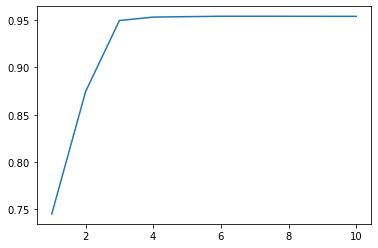

In [8]:
plt.plot(models_best['adj_r2'])
plt.show()

In [9]:
model_final = models_best.iloc[models_best['adj_r2'].argmax(),0]

In [10]:
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1183.
Date:                Sun, 13 Feb 2022   Prob (F-statistic):          3.50e-259
Time:                        16:51:52   Log-Likelihood:                -2400.0
No. Observations:                 400   AIC:                             4816.
Df Residuals:                     392   BIC:                             4848.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -488.6159     25.289    -19.321      0.000    -538.335    -438.897
Gender[T.Female]   -10.4532      9.890     -1.057      0.291     -29.896       8.990
Student[T.Yes]     426.5813     16.533     25.802      0.000     394.077     459.085
Income              -7.8036      0.234    -33.417      0.000      -8.263      -7.345
Limit                0.1936      0.032      5.980      0.000       0.130       0.257
Rating               1.0940      0.485      2.257      0.025       0.141       2.047
Cards               18.1092      4.319      4.193      0.000       9.618      26.601
Age                 -0.6207      0.292     -2.127      0.034      -1.194      -0.047
==============================================================================
Omnibus:                       34.049   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.600
Skew:                           0.773   Prob(JB):                     1.53e-09
Kurtosis:                       3.211   Cond. No.                     2.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4.3  Shrinkage method
### Ridge Regression

$$RSS + \lambda \sum_{j=1}^p \beta_j^2 $$

- $\lambda \geq 0$: tuning parameter 
    - 여러 $\lambda$을 시도해 보고 좋은 값을 선택 
- RSS+ L2 penalty의 형태 
- $\beta_j$의 추정치를 0과 가깝게 수축하는 효과 

In [11]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X, y)

Ridge()

In [12]:
y_pred = ridge_reg.predict(X)

In [13]:
ridge_reg.coef_

array([[ 0.00000000e+00, -1.01531108e+01,  4.13899860e+02,
        -9.12155389e+00,  1.67728726e+01,  9.66826039e+00,
        -7.79613765e+00,  1.88633083e-01,  1.16935286e+00,
         1.74952276e+01, -6.22845855e-01, -1.00749787e+00]])

### Lasso Regression
- Ridge regression은 $\beta_j$값이 0을 향해 수축하지만 정확하게 0을 만들지는 않음 

$$RSS + \lambda \sum_{j=1}^p |\beta_j| $$

- L1 penalty를 사용 
- $\lambda$가 충분히 클 경우 계수 추정치의 일부가 정확히 0이 되게 함 
- 변수선택의 효과 


<img src='http://drive.google.com/uc?export=view&id=1TVY99Zg9H6bRacibI_RJxuZZqPX3SO35' /><br>


- Ridge는 $\beta_j$를 전체적으로 축소시키는 효과
- Lasso는 덜 중요한 변수에 대해 $\beta_j=0$으로 만드는 효과
    - 자동적인 feature selection 과정 


In [14]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X, y)

y_pred = lasso_reg.predict(X)

C:\Users\zyunhyeok\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1893812.8720691514, tolerance: 8433.991191
  model = cd_fast.enet_coordinate_descent(


In [15]:
lasso_reg.coef_

array([ 0.00000000e+00, -1.06082218e+01,  4.25689009e+02, -8.45041224e+00,
        1.66497454e+01,  9.99657462e+00, -7.80320873e+00,  1.91959216e-01,
        1.12083024e+00,  1.77952880e+01, -6.13858939e-01, -1.10161563e+00])